In [131]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [132]:
from implementations import *

In [133]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

We have the only one column with integer values (it looks like clusters), so we divide the dataset by this value

In [134]:
np.unique(tX[:,22])

array([0., 1., 2., 3.])

In [135]:
tX0=np.copy(tX[tX[:,22]==0,:])
ids0=np.copy(ids[tX[:,22]==0])
y0 = np.copy(y[tX[:,22]==0])

tX1=np.copy(tX[tX[:,22]==1,:])
ids1=np.copy(ids[tX[:,22]==1])
y1 = np.copy(y[tX[:,22]==1])

tX2=np.copy(tX[tX[:,22]==2,:])
ids2=np.copy(ids[tX[:,22]==2])
y2 =  np.copy(y[tX[:,22]==2])

tX3=np.copy(tX[tX[:,22]==3,:])
ids3=np.copy(ids[tX[:,22]==3])
y3 =  np.copy(y[tX[:,22]==3])

print('Shapes of clusters are: ',tX0.shape,tX1.shape,tX2.shape,tX3.shape)

Shapes of clusters are:  (99913, 30) (77544, 30) (50379, 30) (22164, 30)


In [136]:
#Deleting columns with clusters
tX0=np.copy(np.delete(tX0,(22),axis=1))
tX1=np.copy(np.delete(tX1,(22),axis=1))
tX2=np.copy(np.delete(tX2,(22),axis=1))
tX3=np.copy(np.delete(tX3,(22),axis=1))

In [137]:
#Counting NaNs in columns in each cluster
print('Amount of NaNs in 0 cluster: \n',np.count_nonzero(tX0==-999.0, axis = 0))
print('Amount of NaNs in 1 cluster: \n',np.count_nonzero(tX1==-999.0, axis = 0))
print('Amount of NaNs in 2 cluster: \n',np.count_nonzero(tX2==-999.0, axis = 0))
print('Amount of NaNs in 3 cluster: \n',np.count_nonzero(tX3==-999.0, axis = 0))

Amount of NaNs in 0 cluster: 
 [26123     0     0     0 99913 99913 99913     0     0     0     0     0
 99913     0     0     0     0     0     0     0     0     0 99913 99913
 99913 99913 99913 99913     0]
Amount of NaNs in 1 cluster: 
 [ 7562     0     0     0 77544 77544 77544     0     0     0     0     0
 77544     0     0     0     0     0     0     0     0     0     0     0
     0 77544 77544 77544     0]
Amount of NaNs in 2 cluster: 
 [2952    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
Amount of NaNs in 3 cluster: 
 [1477    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


We see that in clusters 0 and 1 some columns consist only of NaNs That's why we will delete these columns.

In [138]:
#Deleting columns where all values are same
tX0cl=np.copy(tX0[:,np.invert(np.all(tX0 == tX0[0,:], axis = 0))])
tX1cl=np.copy(tX1[:,np.invert(np.all(tX1 == tX1[0,:], axis = 0))])
tX2cl=np.copy(tX2[:,np.invert(np.all(tX2 == tX2[0,:], axis = 0))])
tX3cl=np.copy(tX3[:,np.invert(np.all(tX3 == tX3[0,:], axis = 0))])

Now we have cleaned all columns except the first one. We have different ways to work with it

#### 1.Delete rows with NaNs in the first column

In [139]:
#Don't overwrite global variables
tX0=np.copy(tX0cl)
tX1=np.copy(tX1cl)
tX2=np.copy(tX2cl)
tX3=np.copy(tX3cl)

In [140]:
#Deleting rows with NaNs
ids0d=np.copy(ids0[tX0[:,0]!=-999.0])
y0d = np.copy(y0[tX0[:,0]!=-999.0])
tX0=np.copy(tX0[tX0[:,0]!=-999.0,:])

ids1d=np.copy(ids1[tX1[:,0]!=-999.0])
y1d = np.copy(y1[tX1[:,0]!=-999.0])
tX1=np.copy(tX1[tX1[:,0]!=-999.0,:])

ids2d=np.copy(ids2[tX2[:,0]!=-999.0])
y2d = np.copy(y2[tX2[:,0]!=-999.0])
tX2=np.copy(tX2[tX2[:,0]!=-999.0,:])

ids3d=np.copy(ids3[tX3[:,0]!=-999.0])
y3d = np.copy(y3[tX3[:,0]!=-999.0])
tX3=np.copy(tX3[tX3[:,0]!=-999.0,:])

##### 1.1. See the correlation between regressors

Now let's see correlation between regressors

In [141]:
#Correlation between regressors in tX0
for i in range(len(tX0[0,:])):
    for j in range(i+1,len(tX0[0,:])):
        corr = np.corrcoef(tX0[:,i],tX0[:,j])
        if np.abs(np.corrcoef(tX0[:,i],tX0[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.9428649994377921
Pearson correlation between column 1 and 7 : 0.7025329814432556
Pearson correlation between column 3 and 5 : 0.9999999999991431
Pearson correlation between column 6 and 9 : 0.7921536842510372
Pearson correlation between column 6 and 12 : 0.7801737531532945


So it makes sense to drop columns 0,3,6

In [142]:
#Dropping columns
tX0=tX0[:,[i for i in range(tX0.shape[1]) if i not in [0,3,6]]]

In [143]:
#Correlation between regressors in tX1
for i in range(len(tX1[0,:])):
    for j in range(i+1,len(tX1[0,:])):
        corr = np.corrcoef(tX1[:,i],tX1[:,j])
        if np.abs(np.corrcoef(tX1[:,i],tX1[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.9203955805006697
Pearson correlation between column 3 and 6 : 0.880515673723393
Pearson correlation between column 3 and 15 : 0.7067535021056447
Pearson correlation between column 3 and 17 : 0.719783491337637
Pearson correlation between column 3 and 18 : 0.9473952774313399
Pearson correlation between column 3 and 21 : 0.9473952764775125
Pearson correlation between column 6 and 17 : 0.7682569234879949
Pearson correlation between column 6 and 18 : 0.9128480282626462
Pearson correlation between column 6 and 21 : 0.9128480302418414
Pearson correlation between column 7 and 12 : 0.7106467382693462
Pearson correlation between column 17 and 18 : 0.721078263561643
Pearson correlation between column 17 and 21 : 0.7210782626271482
Pearson correlation between column 18 and 21 : 0.9999999999990334


Let's drop columns 0,3,6,21

In [144]:
#Dropping columns
tX1=tX1[:,[i for i in range(tX1.shape[1]) if i not in [0,3,6,21]]]

In [145]:
#Correlation between regressors in tX2
for i in range(len(tX2[0,:])):
    for j in range(i+1,len(tX2[0,:])):
        corr = np.corrcoef(tX2[:,i],tX2[:,j])
        if np.abs(np.corrcoef(tX2[:,i],tX2[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.8882697562122746
Pearson correlation between column 3 and 9 : 0.8100583553617612
Pearson correlation between column 3 and 19 : 0.7727347641970795
Pearson correlation between column 3 and 21 : 0.7106329242566304
Pearson correlation between column 3 and 22 : 0.8064082142710389
Pearson correlation between column 3 and 28 : 0.7651054026528024
Pearson correlation between column 4 and 5 : 0.8102770843828327
Pearson correlation between column 4 and 6 : -0.8533511261674986
Pearson correlation between column 5 and 6 : -0.7806386730593765
Pearson correlation between column 9 and 21 : 0.8630680375230015
Pearson correlation between column 9 and 22 : 0.9212004546370948
Pearson correlation between column 9 and 28 : 0.9417446400854351
Pearson correlation between column 10 and 16 : 0.7427175522749608
Pearson correlation between column 21 and 22 : 0.8087380200255875
Pearson correlation between column 21 and 28 : 0.8269810542575168
Pearson correlation betwe

Drop columns 0,3,4,9,22

In [146]:
#Dropping columns
tX2=tX2[:,[i for i in range(tX2.shape[1]) if i not in [0,3,4,9,22]]]

In [147]:
#Correlation between regressors in tX3
for i in range(len(tX3[0,:])):
    for j in range(i+1,len(tX3[0,:])):
        corr = np.corrcoef(tX3[:,i],tX3[:,j])
        if np.abs(np.corrcoef(tX3[:,i],tX3[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.8939715045042343
Pearson correlation between column 3 and 19 : 0.7852631621337898
Pearson correlation between column 4 and 5 : 0.758652958037284
Pearson correlation between column 4 and 6 : -0.7768024192719148
Pearson correlation between column 9 and 21 : 0.9209360084498386
Pearson correlation between column 9 and 22 : 0.8823253774045843
Pearson correlation between column 9 and 25 : 0.7709015614616341
Pearson correlation between column 9 and 28 : 0.957878606826293
Pearson correlation between column 10 and 16 : 0.7636779915431535
Pearson correlation between column 21 and 22 : 0.817603943920867
Pearson correlation between column 21 and 25 : 0.7259662973246287
Pearson correlation between column 21 and 28 : 0.8968125698294412
Pearson correlation between column 22 and 28 : 0.8874163028182186
Pearson correlation between column 25 and 28 : 0.83669471775916


Drop columns 0,9,21,22

In [148]:
#Dropping columns
tX3=tX3[:,[i for i in range(tX3.shape[1]) if i not in [0,9,21,22]]]

In [149]:
#TODO Check correlation between regressors and the result value

In [150]:
#Data standartization
tX0_11=standartize(tX0)
tX1_11=standartize(tX1)
tX2_11=standartize(tX2)
tX3_11=standartize(tX3)

### Models creation (tX0_11..tX3_11 to y0d...y3d)

###### Linear regression

In [151]:
y = [y0d, y1d, y2d, y3d]
tXst = [tX0_11, tX1_11, tX2_11, tX3_11]
def LinearRegressionSubmission(y, tXst):
    w_list = []
    rmse_list = []
    for i in range(len(y)):
        w, mse = least_squares(y[i], tXst[i])
        w_list.append(w)
        rmse_list.append(np.sqrt(2*mse))
    return w_list, rmse_list
LinearRegressionSubmission(y, tXst)

([array([-2.06880312e-01, -4.58597236e-01,  3.52838215e-01,  3.23421071e-02,
         -1.58959755e-01, -1.15919349e-02,  2.81667771e-01,  9.47439000e-05,
          4.26477717e-04,  1.65336871e-01,  4.68799168e-03,  6.38468391e-04,
         -2.37790473e-02, -6.95609668e-03,  3.95805980e-02]),
  array([-2.06301728e-01, -2.50211556e-01,  2.76199667e-01,  3.96837306e-02,
         -1.91784626e-01,  1.18899478e-01,  1.77286403e-01,  3.66955178e-03,
         -6.06497299e-03,  2.48889753e-01, -8.70445912e-03, -8.68657328e-07,
          4.95246061e-02,  4.34505291e-03, -2.81561347e-02,  5.48007959e-02,
         -5.30974371e-04, -2.24981539e-03]),
  array([-0.16371398, -0.15131667,  0.20788056,  0.00735713,  0.22116094,
         -0.0555752 , -0.15740836,  0.13985692,  0.18505956,  0.21305616,
         -0.00308169,  0.00068213,  0.2712701 , -0.00727277,  0.00293023,
          0.15992448,  0.0052238 , -0.11861323,  0.00838199,  0.00867409,
          0.0940448 ,  0.0048366 , -0.00577548, -0.1505115

###### Linear regression with polynomial expansion

In [22]:
def polynomial_regression(y, tXst):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    mean_rmse = []
    rmse_list = []
    min_error = 1000
    for ind, degree in enumerate(degrees):
        w0, mse0 = least_squares(y[0], build_poly(tXst[0],degree))
        w1, mse1 = least_squares(y[1], build_poly(tXst[1],degree))
        w2, mse2 = least_squares(y[2], build_poly(tXst[2],degree))
        w3, mse3 = least_squares(y[3], build_poly(tXst[3],degree))
        err= np.array([mse0,mse1,mse2,mse3])
        rmse_list = []
        for i in range(len(err)):
            rmse_list.append(np.sqrt(2*err[i]))
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse_list))
        
        #to store the weights with the minimum training error
        if np.mean(rmse_list) < min_error:
            min_error = np.mean(rmse_list)
            w0f,w1f,w2f,w3f = w0,w1,w2,w3

        mean_rmse.append(np.mean(rmse_list))
        # plot fit
        #plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
    #plt.tight_layout()
    #plt.savefig("visualize_polynomial_regression")
    #plt.show()
    print("Best degree: {degree}, training error: {err}".format(degree=mean_rmse.index(min(mean_rmse)),err=np.min(mean_rmse)))
    return degree, np.min(mean_rmse),[w0f,w1f,w2f,w3f]

Processing 1th experiment, degree=1, rmse=[0.7910167024107171, 0.8857077259821294, 0.8506684510165388, 0.8640785210235167]
Processing 2th experiment, degree=3, rmse=[0.7620364562247038, 0.8351179266767852, 0.7981937795351055, 0.8093542931845197]
Processing 3th experiment, degree=7, rmse=[0.7506363097771088, 0.8189092402139859, 0.7709679140699045, 0.794044608684681]
Processing 4th experiment, degree=12, rmse=[0.7467773789812082, 0.8005811377963961, 0.7551286163235877, 0.7694411157031958]
Best degree: 3, training error: 0.767982062201097


<ipython-input-23-f4b505f0879c>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  prevision0=(np.array([ids[0],ypred_list[0]]).T)
<ipython-input-23-f4b505f0879c>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  prevision1=(np.array([ids[1],ypred_list[1]]).T)
<ipython-input-23-f4b505f0879c>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

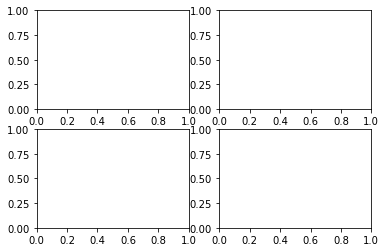

In [23]:
degree,_,w = polynomial_regression(y,tXst)
ypred_list = []
rmse_list = []
sub = []
for i in range(4):
    ypred = predict_labels(w[i], build_poly(tXst[i],degree))
    ypred_list.append(ypred)

#creating submission format
prevision0=(np.array([ids[0],ypred_list[0]]).T)
prevision1=(np.array([ids[1],ypred_list[1]]).T)
prevision2=(np.array([ids[2],ypred_list[2]]).T)
prevision3=(np.array([ids[3],ypred_list[3]]).T)
prevision = np.concatenate((prevision0,prevision1,prevision2,prevision3), axis=0)


submission = sorted(prevision, key=prevision[:,0])

###### Gradient descent

In [ ]:
def GradientDescentSubmission(y, tXst):
  # Define the parameters of the algorithm.
    max_iters = 100
    gamma = 0.5
  # Initialization
    
    w_list = []
    loss_list = []
  # Start GD
    for i in range(4):
        w_initial = np.array([0 for i in range(tXst[i].shape[1])])
        gradient_loss, gradient_w = gradient_descent(y[i], tXst[i], w_initial, max_iters, gamma)
        w_list.append(gradient_w)
        loss_list.append(gradient_loss)
    return w_list, loss_list
GradientDescentSubmission(y,tXst)

###### Stochastic gradient descent

In [24]:
def StochasticGradientDescent(y, tXst):
  # Define the parameters of the algorithm.
    max_iters = 100
    gamma = 0.001
    batch_size = 1
  # Initialization
    w_list = []
    loss_list = []
  # Start SGD.
    for i in range(4):
        w_initial = np.array([0 for i in range(tXst[i].shape[1])])
        sgd_losses, sgd_w = stochastic_gradient_descent(y[i], tXst[i], w_initial, batch_size, max_iters, gamma)
        w_list.append(sgd_w)
        loss_list.append(sgd_losses)
    return w_list, loss_list
StochasticGradientDescent(y, tXst)

([array([-0.03953648, -0.00835486,  0.01807197, -0.00663377, -0.02433187,
          0.01337897,  0.01250804,  0.00348614, -0.00726161, -0.01795264,
         -0.0077468 ,  0.01124808, -0.02361948, -0.01893504,  0.00024943]),
  array([-0.02351591,  0.00108344,  0.01301907, -0.00146986, -0.03370089,
          0.02917919,  0.02215244, -0.00269818, -0.01068807, -0.01748665,
         -0.00024932, -0.00090134,  0.00666417, -0.00540354,  0.00534665,
          0.01400693, -0.00442097,  0.0080783 ]),
  array([-0.01726204, -0.00730088,  0.03067101, -0.0321546 , -0.00369207,
         -0.00240034, -0.02041713,  0.00798676,  0.03914496,  0.02928135,
          0.00298133, -0.00496922, -0.00728747, -0.00343598,  0.01795668,
         -0.00532421, -0.00087185, -0.00793809, -0.00393357, -0.02118535,
         -0.00500613,  0.0070464 ,  0.00690569, -0.00915552]),
  array([-0.01108834,  0.00796019,  0.02183295, -0.00056793, -0.00041752,
         -0.00297566, -0.00638126,  0.00488044, -0.00836563,  0.0225326

###### Ridge regression

In [25]:
def cross_validation_demo():
    seed = 1
    k_fold = 4
    lambdas = np.logspace(-2, 1, 8)
    # split data in k fold
    num_degrees=3
    # define lists to store the loss of training data and test data
    #matrices for storing lists (for 4 subsets) of errors
    #matrix_te=np.zeros(shape=(num_degrees,len(lambdas)),dtype=list)
    #matrix_tr=np.zeros(shape=(num_degrees,len(lambdas)),dtype=list)
    matrix_te0=np.zeros(shape=(num_degrees,len(lambdas)))
    matrix_tr0=np.zeros(shape=(num_degrees,len(lambdas)))
    matrix_te1=np.zeros(shape=(num_degrees,len(lambdas)))
    matrix_tr1=np.zeros(shape=(num_degrees,len(lambdas)))
    matrix_te2=np.zeros(shape=(num_degrees,len(lambdas)))
    matrix_tr2=np.zeros(shape=(num_degrees,len(lambdas)))
    matrix_te3=np.zeros(shape=(num_degrees,len(lambdas)))
    matrix_tr3=np.zeros(shape=(num_degrees,len(lambdas)))
    for degree in np.arange(num_degrees):
        for ind_lmbd,lambda_ in enumerate(lambdas):
            #losses_te=[]
            #losses_tr=[]
            for i in range(0,4):
                k_indices,indices = build_k_indices(y[i], k_fold, seed)
                loss_tr=0
                loss_te=0
                for k in range(k_fold):
                    #print([degree,ind_lmbd,i,k])
                    l_tr, l_te,_ = cross_validation_ridge(y[i], tXst[i], k_indices, k, lambda_, degree)
                    loss_tr+=l_tr
                    loss_te+=l_te
                if i==0:
                    matrix_te0[degree][ind_lmbd]=loss_te/k_fold
                    matrix_tr0[degree][ind_lmbd]=loss_tr/k_fold
                elif i==1:
                    matrix_te1[degree][ind_lmbd]=loss_te/k_fold
                    matrix_tr1[degree][ind_lmbd]=loss_tr/k_fold
                elif i==2:
                    matrix_te2[degree][ind_lmbd]=loss_te/k_fold
                    matrix_tr2[degree][ind_lmbd]=loss_tr/k_fold
                elif i==3:
                    matrix_te3[degree][ind_lmbd]=loss_te/k_fold
                    matrix_tr3[degree][ind_lmbd]=loss_tr/k_fold
                #losses_te.append(np.mean(loss_te))
                #losses_tr.append(np.mean(loss_tr))
            #matrix_tr[degree][ind_lmbd]= losses_tr
            #matrix_te[degree][ind_lmbd]=losses_te
    
   
    
    #get the best degree lambda couple  
    result = np.where(matrix_te0 == np.amin(matrix_te0))
    listOfCoordinates = list(zip(result[0], result[1]))
    best_degree = listOfCoordinates[0][0]
    best_lambda = listOfCoordinates[0][1]
    print('Best parameters for 0 subset are:',best_degree,lambdas[best_lambda],' with error: ',matrix_te0[best_degree][best_lambda])
    
    result = np.where(matrix_te1 == np.amin(matrix_te1))
    listOfCoordinates = list(zip(result[0], result[1]))
    best_degree = listOfCoordinates[0][0]
    best_lambda = listOfCoordinates[0][1]
    print('Best parameters for 1 subset are:',best_degree,lambdas[best_lambda],' with error: ',matrix_te1[best_degree][best_lambda])
    
    result = np.where(matrix_te2 == np.amin(matrix_te2))
    listOfCoordinates = list(zip(result[0], result[1]))
    best_degree = listOfCoordinates[0][0]
    best_lambda = listOfCoordinates[0][1]
    print('Best parameters for 2 subset are:',best_degree,lambdas[best_lambda],' with error: ',matrix_te2[best_degree][best_lambda])
    
    result = np.where(matrix_te3 == np.amin(matrix_te3))
    listOfCoordinates = list(zip(result[0], result[1]))
    best_degree = listOfCoordinates[0][0]
    best_lambda = listOfCoordinates[0][1]
    print('Best parameters for 3 subset are:',best_degree,lambdas[best_lambda],' with error: ',matrix_te3[best_degree][best_lambda])
    
    print(matrix_te0,matrix_te1,matrix_te2,matrix_te3)
    #show cross validation for each degree
    """
    ind_row = 0
    for row in matrix_te:
        degree = ind_row
        lambdas = list(range(len(row)))
        rmse_te = row
        rmse_tr = matrix_tr[ind_row, :]
        cross_validation_visualization(lambdas, rmse_tr, rmse_te)
        ind_row += 1
    plt.show()

    return best_degree, best_lambda
    """
cross_validation_demo()

Best parameters for 0 subset are: 1 0.01  with error:  0.7929677144488401
Best parameters for 1 subset are: 2 0.01  with error:  0.8450561850194014
Best parameters for 2 subset are: 2 0.01  with error:  0.8173424201564052
Best parameters for 3 subset are: 2 0.01  with error:  0.8320016918872625
[[0.93630976 0.93645421 0.93732362 0.94137645 0.95317962 0.97125258
  0.98617216 0.99424679]
 [0.79296771 0.7959668  0.80461279 0.82188364 0.85171029 0.89660549
  0.94290872 0.97407404]
 [2.63784812 2.50596282 2.11248506 1.4968839  0.92503176 0.94594117
  1.17291633 1.16651706]] [[0.97364297 0.97370116 0.9740531  0.97569909 0.98052021 0.98797365
  0.99418946 0.99757674]
 [0.88634788 0.88770695 0.89194932 0.90119727 0.91843812 0.94433812
  0.96988659 0.98647535]
 [0.84505619 0.84631685 0.84932718 0.85628768 0.8726649  0.90067554
  0.93105463 0.95601466]] [[0.99785752 0.99786204 0.99788998 0.9980218  0.99841024 0.99901492
  0.99952264 0.9998006 ]
 [0.85156878 0.85317203 0.85792353 0.86728612 0.883

###### Logistic regression

In [198]:
def sigmoid(x):
    t=np.copy(x)
    t[t>0]=1/(1+np.exp(-t[t>0]))
    t[t<0]=np.exp(t[t<0])/(1+np.exp(t[t<0]))
    return t

def calculate_loss(y, tx, w):
    pred = sigmoid(tx.dot(w))
    loss=((y+1)/2.0).T.dot(np.log(pred+1e-20)) + (1 - ((y+1)/2.0)).T.dot(np.log(1 - pred+1e-20))
    return np.squeeze(loss)

def calculate_gradient(y, tx, w):
    pred = sigmoid(tx.dot(w))
    grad = tx.T.dot(pred-(y+1)/2.0)
    return grad

def learning_by_gradient_descent(y, tx, w, gamma):
    loss=calculate_loss(y,tx,w)
    grad = calculate_gradient(y,tx,w)
    w = w-gamma*grad
    return loss, w

In [187]:
def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-6
    gamma = 0.00001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    #w = np.random.rand(tx.shape[1], 1)
    w=np.zeros((tx.shape[1],1))
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        #print(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    return loss,w

In [193]:
def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-6
    gamma = 0.00001
    all_losses=[]
    weights=[]
    
    for i in range(0,4):
        losses = []
        
        # build tx and ty
        tx = np.c_[np.ones((y[i].shape[0], 1)), x[i]]
        w = np.random.rand(tx.shape[1], 1)
        ty=y[i].reshape(y[i].shape[0],1)

        print('Training for subset {0}\n'.format(i))
        # start the logistic regression
        for iter in range(max_iter):
            
            # get loss and update w
            loss, w = learning_by_gradient_descent(ty, tx, w, gamma)
            
            # log info
            if iter % 100 == 0:
                print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
            
            #store loss
            losses.append(loss)
            
            # converge criterion
            if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
                break

        print("\nBest loss for subset {i}={l}\n".format(i=i,l=calculate_loss(ty, tx, w)))
        all_losses.append(losses)
        weights.append(w)
    return all_losses,weights

In [194]:
loss,w=logistic_regression_gradient_descent_demo(y,tXst)

Training for subset 0

Current iteration=0, loss=-114597.1840925516
Current iteration=100, loss=-33872.57395556392
Current iteration=200, loss=-33476.195047984336
Current iteration=300, loss=-33343.64827424953
Current iteration=400, loss=-33292.071286279366
Current iteration=500, loss=-33270.29552543046
Current iteration=600, loss=-33260.62300141582
Current iteration=700, loss=-33256.17733863803
Current iteration=800, loss=-33254.08412781131
Current iteration=900, loss=-33253.080985782806
Current iteration=1000, loss=-33252.59381657056
Current iteration=1100, loss=-33252.35480512532
Current iteration=1200, loss=-33252.23661105214
Current iteration=1300, loss=-33252.17779797679
Current iteration=1400, loss=-33252.148388331676
Current iteration=1500, loss=-33252.13362426477
Current iteration=1600, loss=-33252.12618929323
Current iteration=1700, loss=-33252.1224357776
Current iteration=1800, loss=-33252.120537031544
Current iteration=1900, loss=-33252.11957499187
Current iteration=2000, l

In [197]:
#Accuracy
for i in range(4):
    print('Accuracy for subset {i} is {acc}'.format(i=i,acc=np.sum(np.where(sigmoid(np.c_[np.ones((y[i].shape[0], 1)), tXst[i]]@w[i])>0.5,1,0)==((y[i].reshape(y[i].shape[0],1)+1)/2.0).astype('int'))/y[i].shape[0]))

Accuracy for subset 0 is 0.7878845372001626
Accuracy for subset 1 is 0.6924494870109457
Accuracy for subset 2 is 0.7306175807029751
Accuracy for subset 3 is 0.7179871416831827


##### 1.2. Don't see the correlation between regressors

In [ ]:
#Data standartization
tX0_12=standartize(tX0cl)
tX1_12=standartize(tX1cl)
tX2_12=standartize(tX2cl)
tX3_12=standartize(tX3cl)

### Models creation (tX0_12..tX3_12 to y0d...y3d)

#### 2.Substitute rows with NaNs in the first column by the mean value

In [277]:
#Don't overwrite global variables
tX0=np.copy(tX0cl)
tX1=np.copy(tX1cl)
tX2=np.copy(tX2cl)
tX3=np.copy(tX3cl)

In [278]:
#Calculate mean for 1st column without -999.0 values
mean0=tX0[tX0[:,0]!=-999.0].mean(axis=0)[0]
mean1=tX1[tX1[:,0]!=-999.0].mean(axis=0)[0]
mean2=tX2[tX2[:,0]!=-999.0].mean(axis=0)[0]
mean3=tX3[tX3[:,0]!=-999.0].mean(axis=0)[0]

In [ ]:
tX0[tX0[:,0]!=-999.0].mean(axis=0)[0]

In [279]:
tX0=np.copy(np.where(tX0==-999.0,mean0,tX0))
tX1=np.copy(np.where(tX1==-999.0,mean1,tX1))
tX2=np.copy(np.where(tX2==-999.0,mean2,tX2))
tX3=np.copy(np.where(tX3==-999.0,mean3,tX3))

##### 2.1. See the correlation between regressors

Now let's see correlation between regressors

In [283]:
#Correlation between regressors in tX0
for i in range(len(tX0[0,:])):
    for j in range(i+1,len(tX0[0,:])):
        corr = np.corrcoef(tX0[:,i],tX0[:,j])
        if np.abs(np.corrcoef(tX0[:,i],tX0[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.7488162009965309
Pearson correlation between column 3 and 5 : 0.9999999999988465
Pearson correlation between column 6 and 9 : 0.8002688533328596
Pearson correlation between column 6 and 12 : 0.7797439568172713


So it makes sense to drop columns 0,3,6

In [284]:
#Dropping columns
tX0=tX0[:,[i for i in range(tX0.shape[1]) if i not in [0,3,6]]]

In [285]:
#Correlation between regressors in tX1
for i in range(len(tX1[0,:])):
    for j in range(i+1,len(tX1[0,:])):
        corr = np.corrcoef(tX1[:,i],tX1[:,j])
        if np.abs(np.corrcoef(tX1[:,i],tX1[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.8445009835185863
Pearson correlation between column 3 and 6 : 0.8632110677076686
Pearson correlation between column 3 and 17 : 0.7125818159025532
Pearson correlation between column 3 and 18 : 0.9367590332144766
Pearson correlation between column 3 and 21 : 0.9367590311733165
Pearson correlation between column 6 and 17 : 0.757990128208487
Pearson correlation between column 6 and 18 : 0.9051662981927852
Pearson correlation between column 6 and 21 : 0.905166300382275
Pearson correlation between column 7 and 12 : 0.709867998636906
Pearson correlation between column 17 and 18 : 0.7068771933564622
Pearson correlation between column 17 and 21 : 0.7068771905369512
Pearson correlation between column 18 and 21 : 0.999999999999017


Let's drop columns 0,3,6,21

In [286]:
#Dropping columns
tX1=tX1[:,[i for i in range(tX1.shape[1]) if i not in [0,3,6,21]]]

In [287]:
#Correlation between regressors in tX2
for i in range(len(tX2[0,:])):
    for j in range(i+1,len(tX2[0,:])):
        corr = np.corrcoef(tX2[:,i],tX2[:,j])
        if np.abs(np.corrcoef(tX2[:,i],tX2[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.8228939521810881
Pearson correlation between column 3 and 9 : 0.800559238241552
Pearson correlation between column 3 and 19 : 0.7285433946032545
Pearson correlation between column 3 and 21 : 0.7069249354905159
Pearson correlation between column 3 and 22 : 0.7995787774292449
Pearson correlation between column 3 and 28 : 0.7584645222360212
Pearson correlation between column 4 and 5 : 0.8098715851425442
Pearson correlation between column 4 and 6 : -0.8501315483608742
Pearson correlation between column 5 and 6 : -0.7780946604694609
Pearson correlation between column 9 and 21 : 0.8523147287795626
Pearson correlation between column 9 and 22 : 0.9191164357409889
Pearson correlation between column 9 and 28 : 0.9397870414625126
Pearson correlation between column 10 and 16 : 0.7438565749365871
Pearson correlation between column 21 and 22 : 0.7970772581576845
Pearson correlation between column 21 and 28 : 0.8147451242277628
Pearson correlation betwee

Drop columns 0,3,4,9,22

In [288]:
#Dropping columns
tX2=tX2[:,[i for i in range(tX2.shape[1]) if i not in [0,3,4,9,22]]]

In [289]:
#Correlation between regressors in tX3
for i in range(len(tX3[0,:])):
    for j in range(i+1,len(tX3[0,:])):
        corr = np.corrcoef(tX3[:,i],tX3[:,j])
        if np.abs(np.corrcoef(tX3[:,i],tX3[:,j])[0,1])> 0.7:
            print("Pearson correlation between column {i} and {j} : {corr}".format(i=i,j=j,corr=corr[0,1]))

Pearson correlation between column 0 and 2 : 0.8172288262177909
Pearson correlation between column 3 and 19 : 0.7502599406025436
Pearson correlation between column 4 and 5 : 0.758966330984028
Pearson correlation between column 4 and 6 : -0.7735086978837818
Pearson correlation between column 9 and 21 : 0.9160946827155181
Pearson correlation between column 9 and 22 : 0.8813251894172176
Pearson correlation between column 9 and 25 : 0.7708057103889608
Pearson correlation between column 9 and 28 : 0.9569498612168339
Pearson correlation between column 10 and 16 : 0.7683893227784884
Pearson correlation between column 21 and 22 : 0.8132272408011297
Pearson correlation between column 21 and 25 : 0.7219329222297065
Pearson correlation between column 21 and 28 : 0.892063808128829
Pearson correlation between column 22 and 28 : 0.887903038587193
Pearson correlation between column 25 and 28 : 0.8365333266992916


Drop columns 0,9,21,22

In [290]:
#Dropping columns
tX3=tX3[:,[i for i in range(tX3.shape[1]) if i not in [0,9,21,22]]]

In [82]:
#TODO Check correlation between regressors and the result value

In [291]:
#Data standartization
tX0_21=standartize(tX0)
tX1_21=standartize(tX1)
tX2_21=standartize(tX2)
tX3_21=standartize(tX3)

### Models creation (tX0_21..tX3_21 to y0...y3)

##### 2.2. Don't the correlation between regressors

In [293]:
#Don't overwrite global variables
tX0=np.copy(tX0cl)
tX1=np.copy(tX1cl)
tX2=np.copy(tX2cl)
tX3=np.copy(tX3cl)

#Replace NaNs with median
tX0=np.copy(np.where(tX0==-999.0,mean0,tX0))
tX1=np.copy(np.where(tX1==-999.0,mean1,tX1))
tX2=np.copy(np.where(tX2==-999.0,mean2,tX2))
tX3=np.copy(np.where(tX3==-999.0,mean3,tX3))

#Data standartization
tX0_22=standartize(tX0)
tX1_22=standartize(tX1)
tX2_22=standartize(tX2)
tX3_22=standartize(tX3)

### Models creation (tX0_22..tX3_22 to y0...y3)

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)